In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Load dataset
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Outliers Detection

Text(0.5, 0, 'BMI')

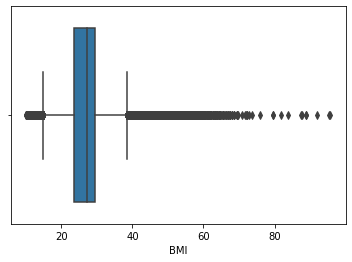

In [5]:
# Boxplot
sns.boxplot(x=df.bmi)
plt.xlabel('BMI')

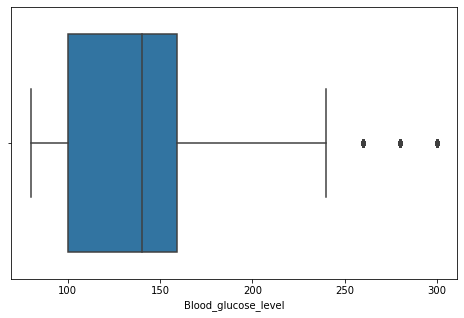

In [7]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['blood_glucose_level'])
plt.xlabel("Blood_glucose_level")
plt.show()

In [8]:
def count_outliers(dataframe, column_name):
    column_data = dataframe[column_name]
    
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = column_data[(column_data<lower_bound) | (column_data>upper_bound)]
    return len(outliers)

In [9]:
attributes = ['age', 'HbA1c_level', 'blood_glucose_level', 'bmi']

for attribute in attributes:
    count = count_outliers(df, attribute)
    print(attribute)
    print('Number of outliers:',count,'out of',len(df[attribute]))

age
Number of outliers: 0 out of 100000
HbA1c_level
Number of outliers: 1315 out of 100000
blood_glucose_level
Number of outliers: 2038 out of 100000
bmi
Number of outliers: 7086 out of 100000


# Remove Outliers

In [23]:
def remove_outliers(dataFrame, column_name):
    column_data = dataFrame[column_name]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3-q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    filtered_df = dataFrame[(column_data >= lower_bound) & (column_data <= upper_bound)]
    return filtered_df

In [25]:
outlier_removed_df = remove_outliers(df,'bmi')
print("Original df:",df.shape)
print("Df shape after removing outlier:",outlier_removed_df.shape)

Original df: (100000, 9)
Df shape after removing outlier: (92914, 9)


In [26]:
outlier_removed_df = remove_outliers(df,'HbA1c_level')
print("Original df:",df.shape)
print("Df shape after removing outlier:",outlier_removed_df.shape)

Original df: (100000, 9)
Df shape after removing outlier: (98685, 9)
